Importing libraries

In [2]:
import pandas as pd

Importing the dataset

In [3]:
data=pd.read_csv('/content/drive/MyDrive/datasets/mlp/startup-2 - startup-2.csv')
data.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,NaN,NaN,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data=data.iloc[:,1:]

Checking Null values

In [6]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              3
Profit             0
dtype: int64

Handling Null Values

In [4]:
data['R&D Spend']=data['R&D Spend'].fillna(data['R&D Spend'].mean())
data['Administration']=data['Administration'].fillna(data['Administration'].mean())
data['Profit']=data['Profit'].fillna(data['Profit'].mean())

In [7]:
import numpy as np
from sklearn.impute import SimpleImputer
SI=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data['State']=SI.fit_transform(data[['State']])

Encoding the labeled dataset

In [8]:
data=pd.get_dummies(data)
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.200000,136897.800000,471784.10,192261.83,0,0,1
1,162597.700000,151377.590000,443898.53,191792.06,1,0,0
2,70148.693261,120580.946957,407934.54,191050.39,0,1,0
3,144372.410000,118671.850000,383199.62,182901.99,0,0,1
4,142107.340000,91391.770000,366168.42,166187.94,0,1,0


Checking Correlation

In [9]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.251992,0.683020,0.921165,-0.099796,0.012104,0.095113
Administration,0.251992,1.000000,-0.024989,0.208506,-0.068586,0.014487,0.059720
Marketing Spend,0.683020,-0.024989,1.000000,0.748876,-0.094633,0.120084,-0.009241
Profit,0.921165,0.208506,0.748876,1.000000,-0.091965,0.071385,0.032505
State_California,-0.099796,-0.068586,-0.094633,-0.091965,1.000000,-0.498117,-0.608069
State_Florida,0.012104,0.014487,0.120084,0.071385,-0.498117,1.000000,-0.385496
State_New York,0.095113,0.059720,-0.009241,0.032505,-0.608069,-0.385496,1.000000


Splitting into target and Features

In [10]:
x=data.iloc[:,1:3]
y=data.iloc[:,3:4]

Splitting into training and testing data

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

Training the model

In [12]:
from sklearn.linear_model import LinearRegression
rg=LinearRegression()
rg.fit(x_train,y_train)

LinearRegression()

In [13]:
y_predict=rg.predict(x_test)

In [14]:
rg.coef_,rg.intercept_


(array([[0.29528649, 0.25239692]]), array([25768.13843642]))

Calculating the accuracy

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)


0.4786076061002287

Plotting the Graph

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 0.92, 'Multiple Linear Regression\n 717822I249 Sandhiya P')

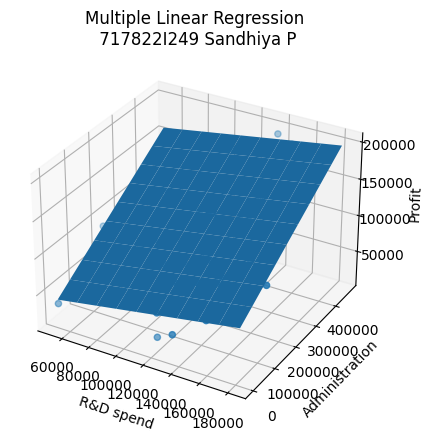

In [17]:

import matplotlib.pyplot as plt
x1_range=np.linspace(min(x.iloc[:,0]),max(x.iloc[:,0]),10)
x2_range=np.linspace(min(x.iloc[:,1]),max(x.iloc[:,1]),10)
x1_grid,x2_grid=np.meshgrid(x1_range,x2_range)
y_grid=rg.predict(np.c_[x1_grid.ravel(),x2_grid.ravel()]).reshape(x1_grid.shape)
#creating 3D plot
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x.iloc[:,0],x.iloc[:,1],y)
ax.plot_surface(x1_grid,x2_grid,y_grid)
ax.set_xlabel('R&D spend')
ax.set_ylabel('Administration')
ax.set_zlabel('Profit')
ax.set_title('Multiple Linear Regression\n 717822I249 Sandhiya P')
